In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install xgboost

In [3]:
from xgboost import XGBRegressor

In [4]:
df=pd.read_csv('Train_Bigmart.csv')

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

In [7]:
# Checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [9]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [11]:
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [12]:
# Getting some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Handling Missing values

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

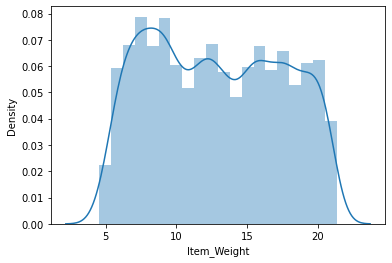

In [13]:
sns.distplot(df.Item_Weight)

In [14]:
df.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
# there is not much difference between mean and median for Item_Weight column. We can replace missing values with either mean or median.
df['Item_Weight']=df.Item_Weight.fillna(df['Item_Weight'].mean())

In [16]:
df['Item_Weight'].isnull().sum()

0

In [17]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
df.Outlet_Size.mode()[0]

'Medium'

In [19]:
# outlet size column is object datatype we can replace missing values with mode.
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [20]:
df['Outlet_Size'].isnull().sum()

0

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

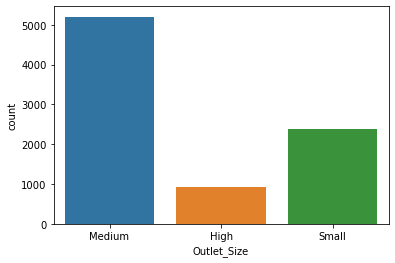

In [21]:
sns.countplot(df['Outlet_Size'])

In [22]:
sns.set()

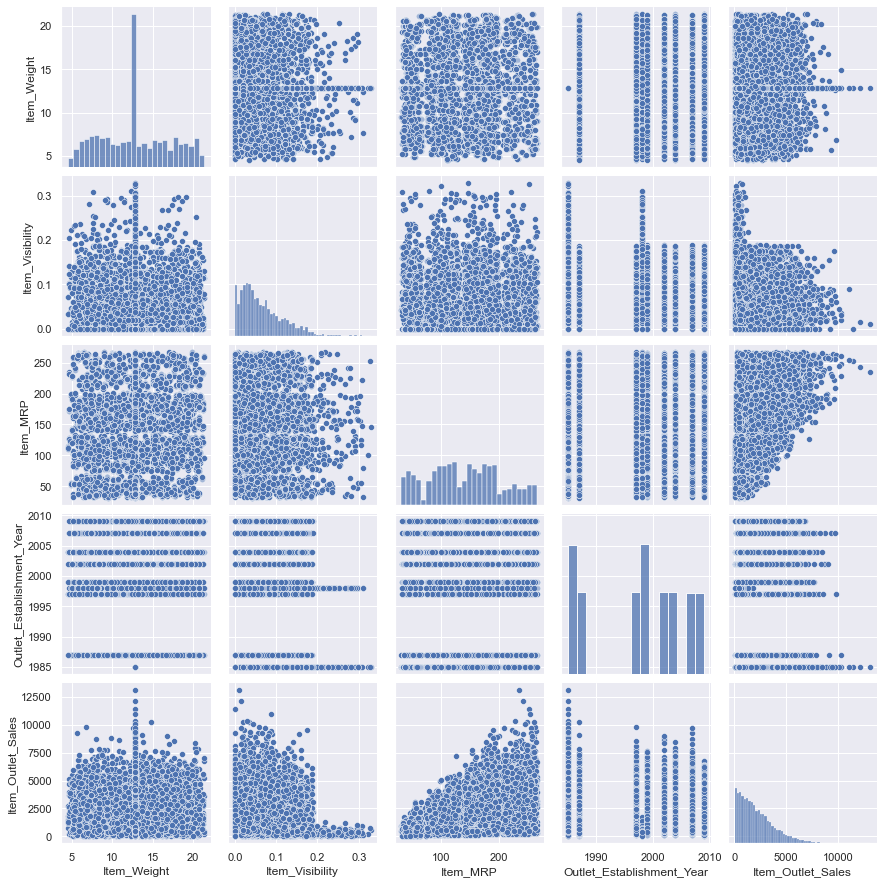

In [23]:
sns.pairplot(df)

In [24]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [25]:
numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

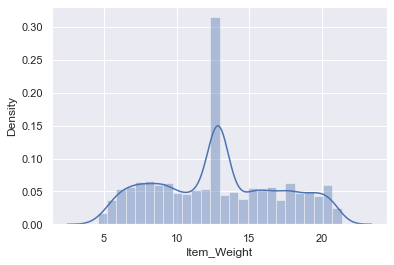

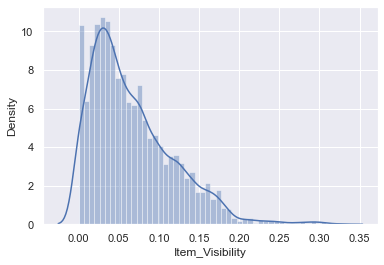

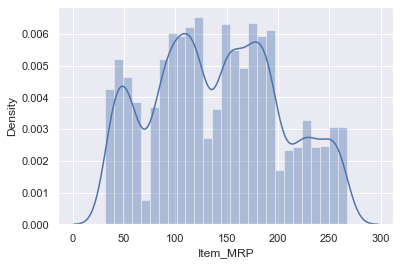

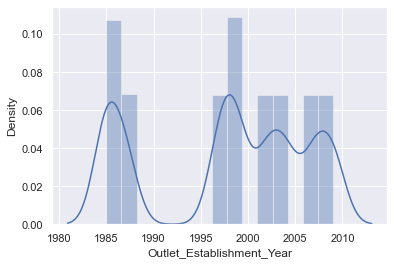

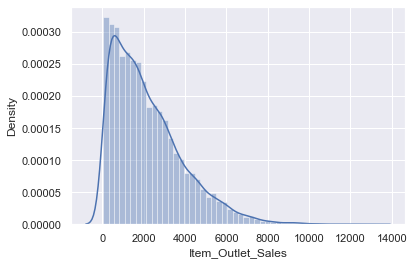

In [26]:
columns=['Item_Weight','Item_Visibility','Item_MRP', 'Outlet_Establishment_Year','Item_Outlet_Sales']
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

In [27]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

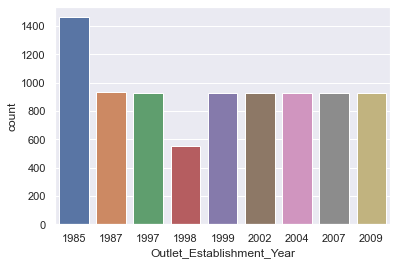

In [28]:
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.show()

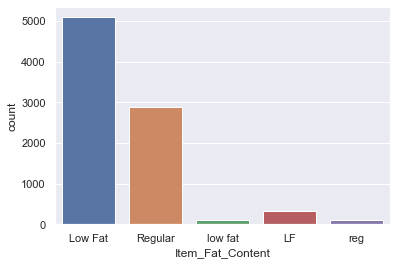

In [29]:
sns.countplot(x='Item_Fat_Content',data=df)
plt.show()

In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
# Here lf,lowfat and Low Fat all are same and reg and Regular are same. So we can replace lf,low fat with Low Fat, reg is replaced with Regular.
df.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)

In [32]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [33]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

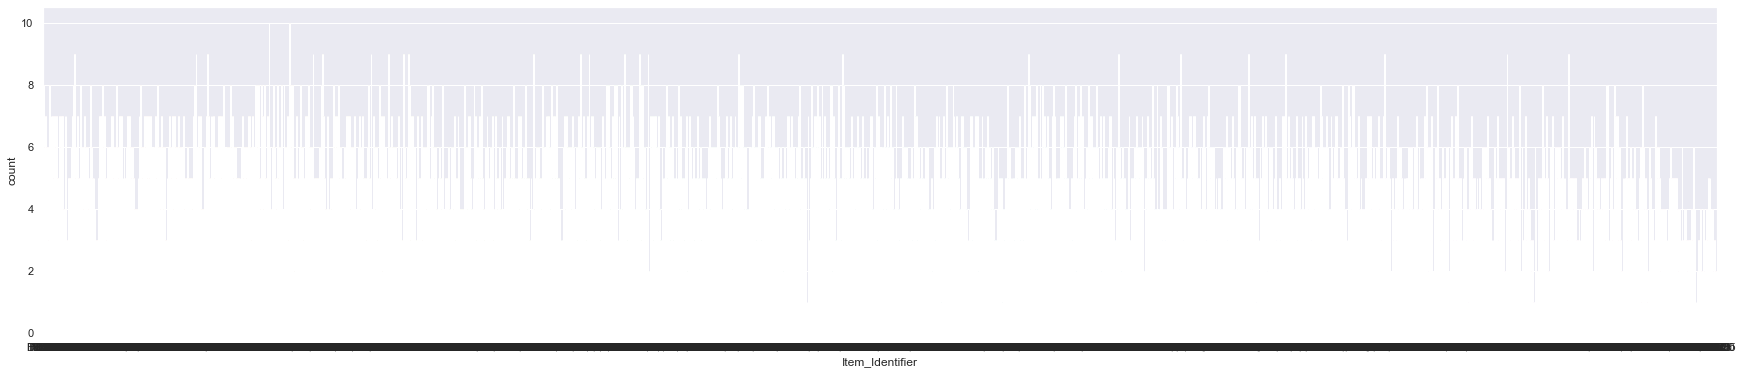

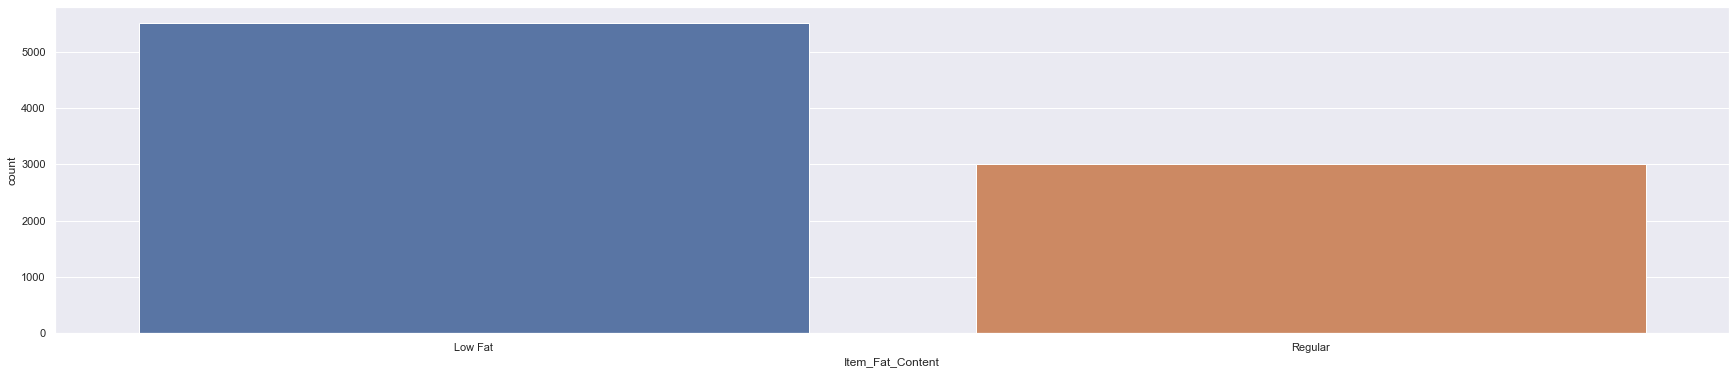

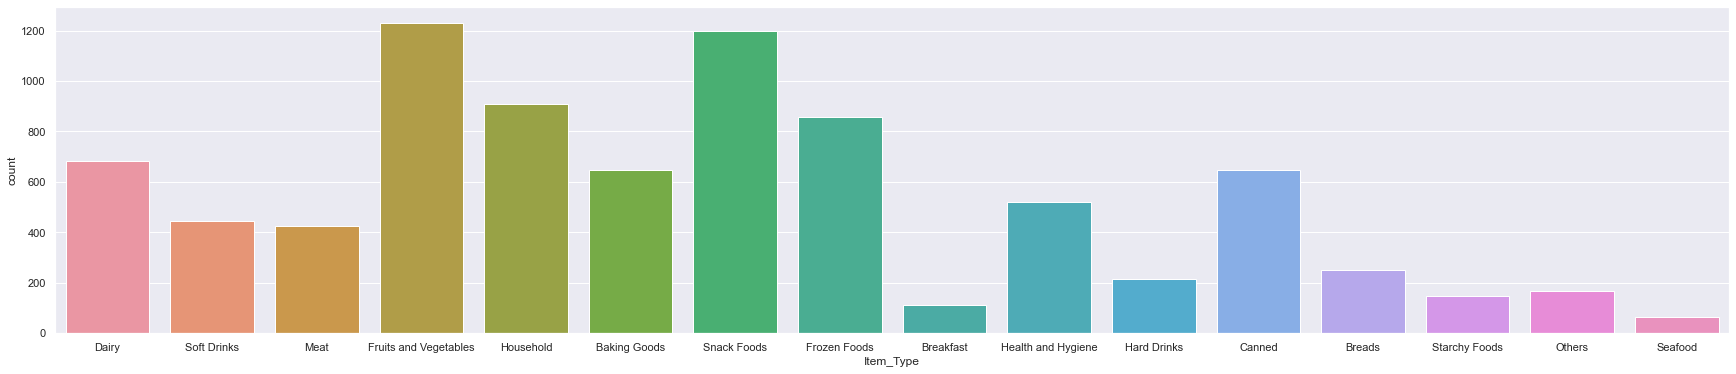

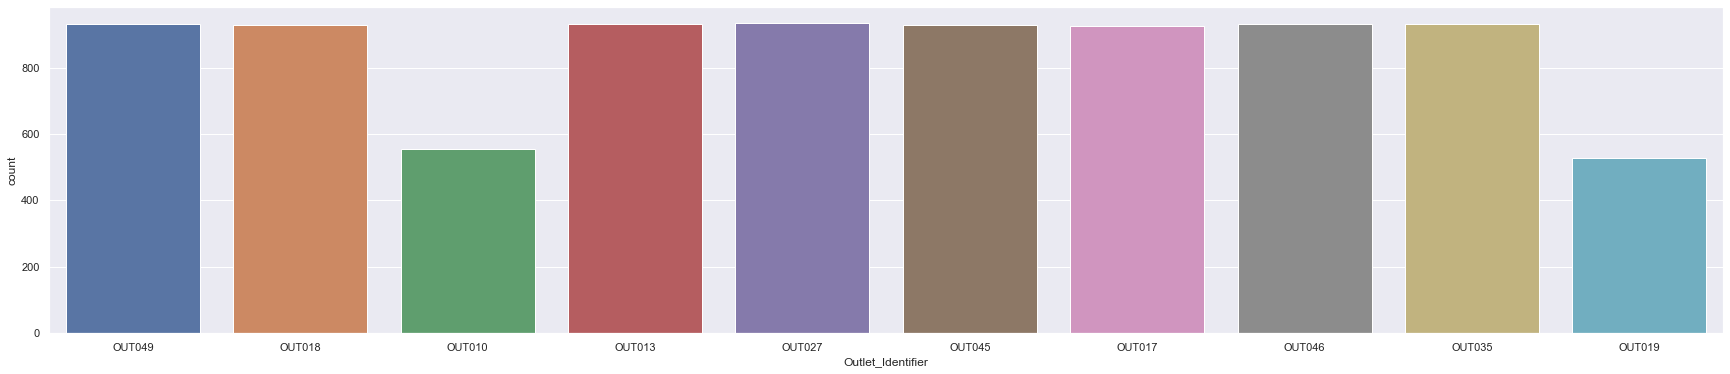

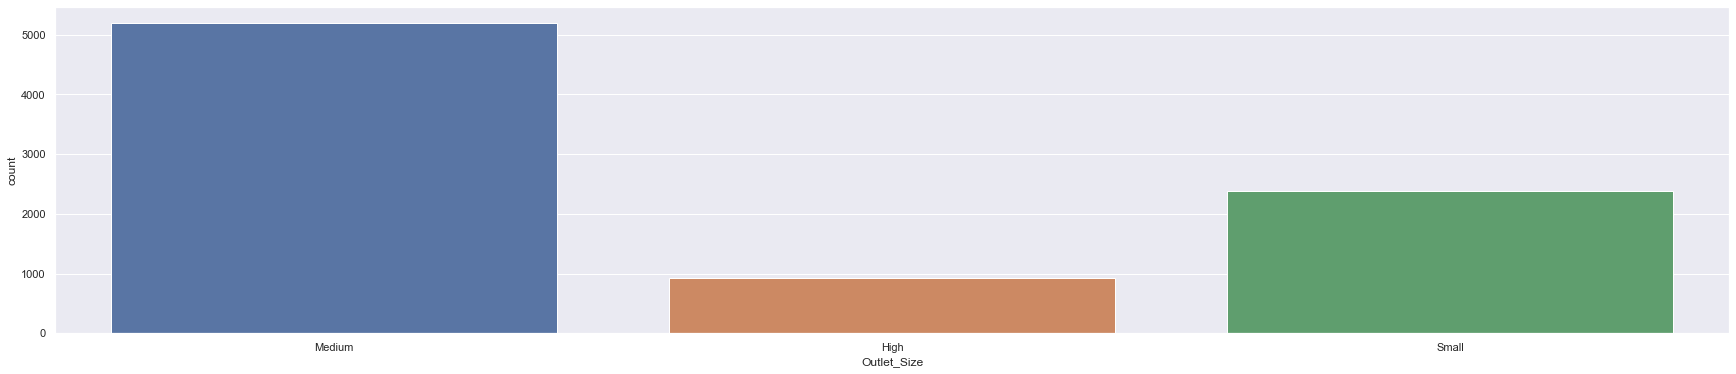

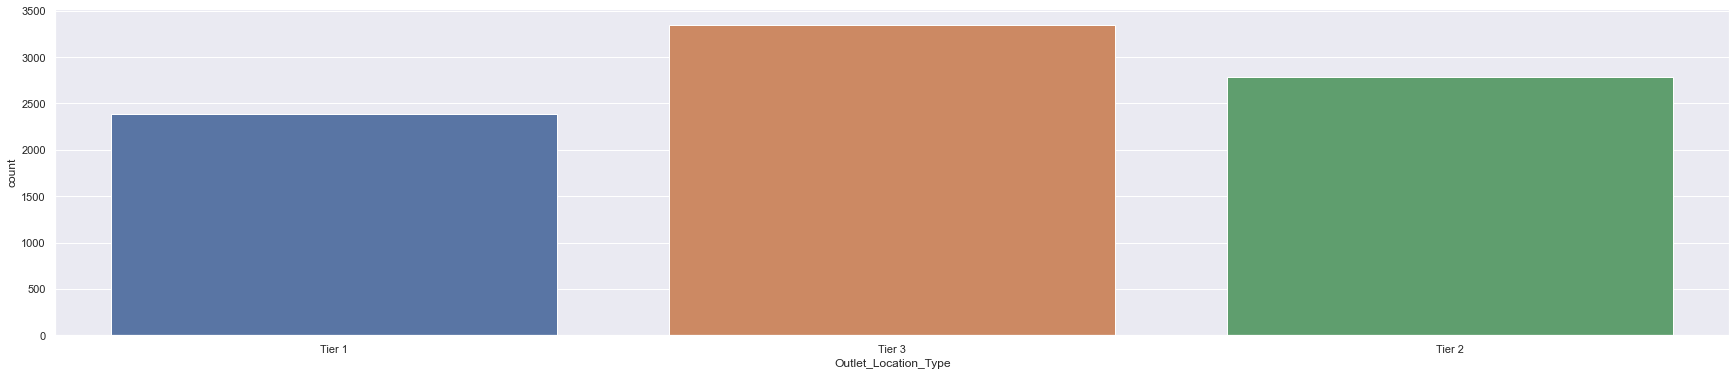

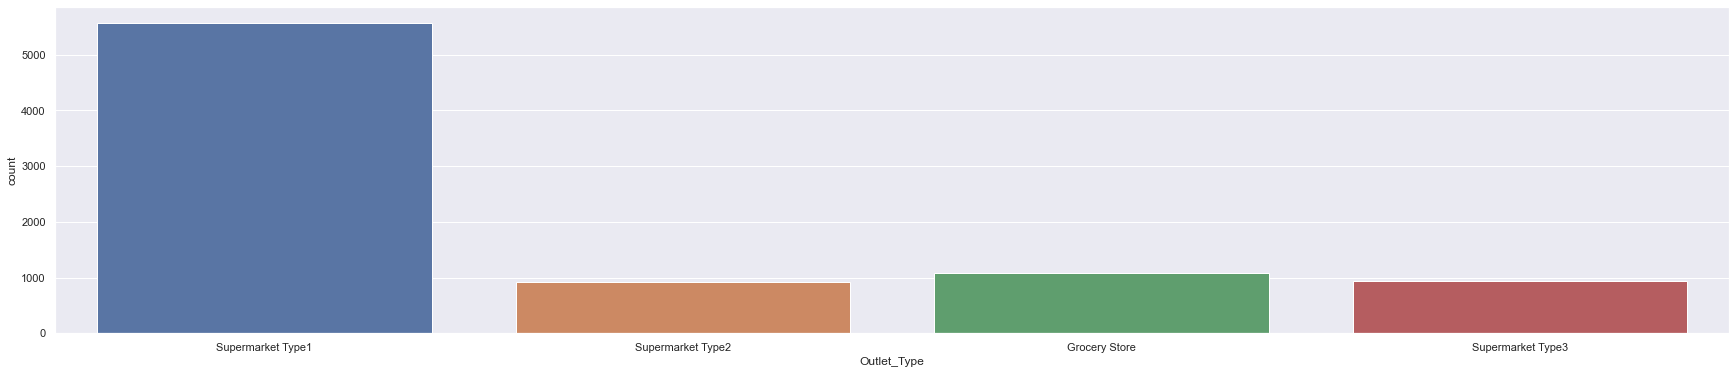

In [34]:
for i in df[categorical_features]:
    plt.figure(figsize=(30,6))
    sns.countplot(df[i])

In [35]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [36]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [37]:
le=LabelEncoder()
for i in df[categorical_features]:
    df[i]=le.fit_transform(df[i])

In [38]:
df[categorical_features].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,0,4,9,1,0,1
1,8,1,14,3,1,2,2
2,662,0,10,9,1,0,1
3,1121,1,6,0,1,2,0
4,1297,0,9,1,0,2,1


In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [40]:
## separating Independent and dependent features
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

In [41]:
## splitting the data into training and test data 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(6818, 11) (6818,) (1705, 11) (1705,)


In [43]:
lg=LinearRegression()
rfr=RandomForestRegressor()
xgb=XGBRegressor()
model=[lg,rfr,xgb]

In [44]:
from sklearn.metrics import r2_score

In [45]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_train)
    print('r2 score of ', m ,'is:')
    print(r2_score(y_train,predm))

r2 score of  LinearRegression() is:
0.5065363930805089
r2 score of  RandomForestRegressor() is:
0.9372813497424091
r2 score of  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) is:
0.8587757505066375


In [46]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('r2 score of ', m ,'is:')
    print(r2_score(y_test,predm))

r2 score of  LinearRegression() is:
0.5246461805160524
r2 score of  RandomForestRegressor() is:
0.5658192674681641
r2 score of  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) is:
0.5333790246993511


In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cvlg=cross_val_score(lg,X,y,cv=5,scoring='r2')

In [49]:
print(cvlg.mean())
print(cvlg.std())

0.5079269803701083
0.01233301671278599


In [50]:
cvrfr=cross_val_score(rfr,X,y,cv=5,scoring='r2')

In [51]:
print(cvrfr.mean())
print(cvrfr.std())

0.5536897256430079
0.014466091750929647


In [52]:
cvxgb=cross_val_score(xgb,X,y,cv=5,scoring='r2')

In [53]:
print(cvxgb.mean())
print(cvxgb.std())

0.5244000473110648
0.02016932708284463


Random forest regressor is the best fit model for this dataset from above observations.

In [54]:
predrfr=rfr.predict(x_test)

In [55]:
predrfr

array([ 725.362468,  814.253426,  778.506624, ...,  761.295694,
        619.846484, 1484.753974])

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid={'bootstrap':[True],'max_depth':[5,10,None],'max_features':['auto','log2'],'n_estimators':[5,6,7,8,9,10,11,12,13]}

In [58]:
rfr=RandomForestRegressor(random_state=1)
grid=GridSearchCV(rfr,param_grid,cv=3,n_jobs=1,verbose=0,scoring='r2')

In [59]:
grid.fit(x_train,y_train)
grid.best_params_

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 13}

In [60]:
rfrbest=RandomForestRegressor(bootstrap=True, max_depth= 5, max_features= 'auto', n_estimators= 13,random_state=1)
rfrbest.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=13, random_state=1)

In [61]:
prediction=rfrbest.predict(x_test)
print(r2_score(y_test,prediction))

0.6185225908908956


In [63]:
import pickle

In [64]:
file=open("Big Mart sales.pkl","wb")
pickle.dump(rfrbest,file)
file.close()

In [67]:
rfrfile=pickle.load(open("Big Mart sales.pkl","rb"))

In [70]:
predictions=rfrfile.predict([[487,14.300000,0,0.026300,5,79.4302,1,1987,0,2,1]])

In [71]:
predictions

array([1314.33673122])